#  Bike sharing dataset

Exploratory analysis of a bike sharing dataset of Washington D.C from [UCI](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

## Dataset description

1. instant: record index
1. dteday : date
1. season : season (1:springer, 2:summer, 3:fall, 4:winter)
1.  yr : year (0: 2011, 1:2012)
1.  mnth : month ( 1 to 12)
1.  hr : hour (0 to 23)
1.  holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
1.  weekday : day of the week
1.  workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
1.  weathersit : 
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
1. temp : Normalized temperature in Celsius. The values are divided to 41 (max)
1. atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
1. hum: Normalized humidity. The values are divided to 100 (max)
1. windspeed: Normalized wind speed. The values are divided to 67 (max)
1. casual: count of casual users
1. registered: count of registered users
1. cnt: count of total rental bikes including both casual and registered

# Daily analysis

Let's understand how the hour-by-hour data behave for each day.

Reading csv using pandas and applying the convenient data transformation.

In [96]:
import pandas as pd

dataset = pd.read_csv('resources/hour.csv')
dataset['dteday'] = pd.to_datetime(dataset['dteday'])

Creating functions to get intervals of time (days, weeks, months, etc...)

In [97]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
from pandas.core.frame import DataFrame

def filter_by_month(ds: DataFrame, date: str):
    end_date = datetime.strptime(date, '%Y-%m-%d') + relativedelta(day=31)
    return filter_by_date(ds, date, end_date.strftime('%Y-%m-%d'))

def filter_by_day(ds: DataFrame, date: str):
    return filter_by_date(ds, date, date)

def filter_by_date(ds: DataFrame, start_date: str, end_date: str):
    
    start_date_parsed = datetime.strptime(start_date, "%Y-%m-%d")
    start_end_parsed = datetime.strptime(end_date, "%Y-%m-%d")
    
    return ds[(ds['dteday'] >= start_date_parsed) & (ds['dteday'] <= start_end_parsed)]

Methods to plot graphs by hour for weekdays

In [98]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

def plot_by_weekday(month_to_evaluate: str, legend: str, weekday: int, field: str, scale: (float, float) = (None, None)):
    month_data = filter_by_month(dataset, month_to_evaluate)
    month_data_weekdays = month_data[month_data['weekday'] == weekday]['dteday'].unique()
    
    plt.figure(figsize=(20,10))
#    plt.suptitle(legend)
    
    for weekday in month_data_weekdays:
        day = month_data[month_data['dteday'] == weekday]
        
        plt.plot(day['hr'], day[field], label=str(weekday)[:10])
    
    plt.legend(loc='upper left')
    plt.xlabel('Hour')
    plt.ylabel(field)
    plt.show()

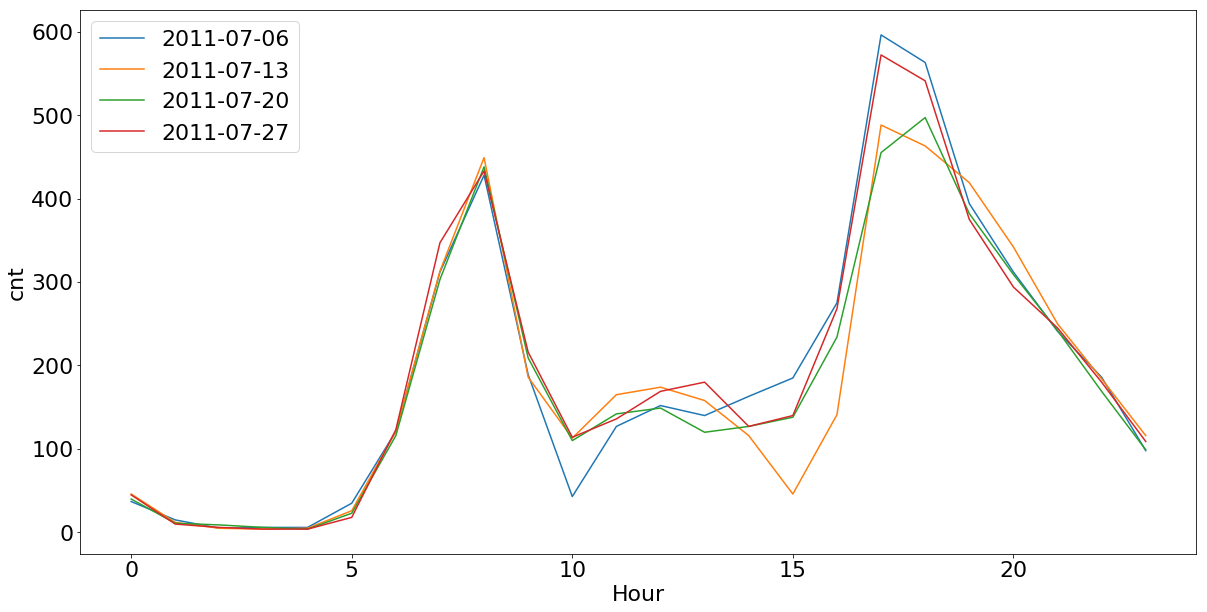

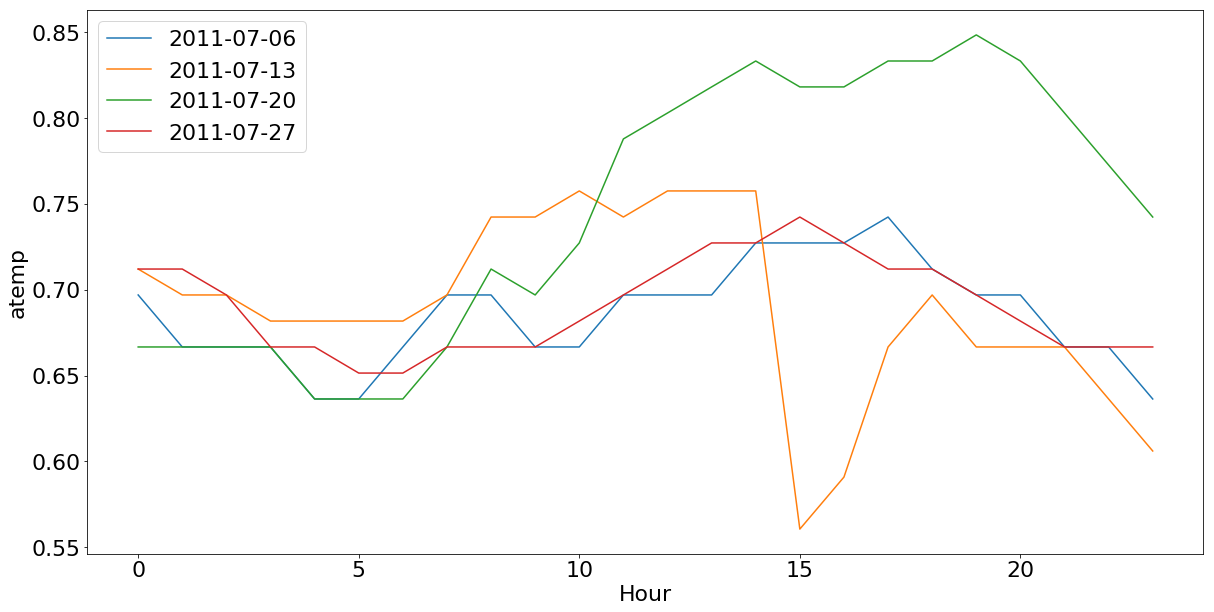

In [99]:
month_to_evaluate = '2011-07-01'
weekday = 3
legend = "Wednesdays in July"

plot_by_weekday(month_to_evaluate, legend, weekday, 'cnt')
plot_by_weekday(month_to_evaluate, legend, weekday, 'atemp')

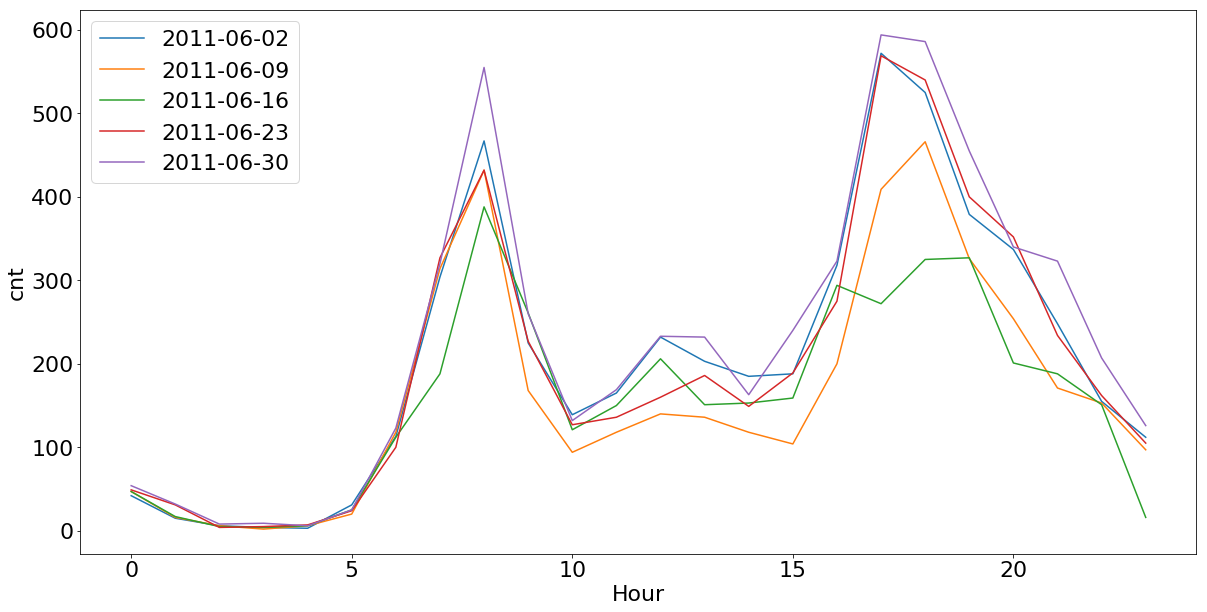

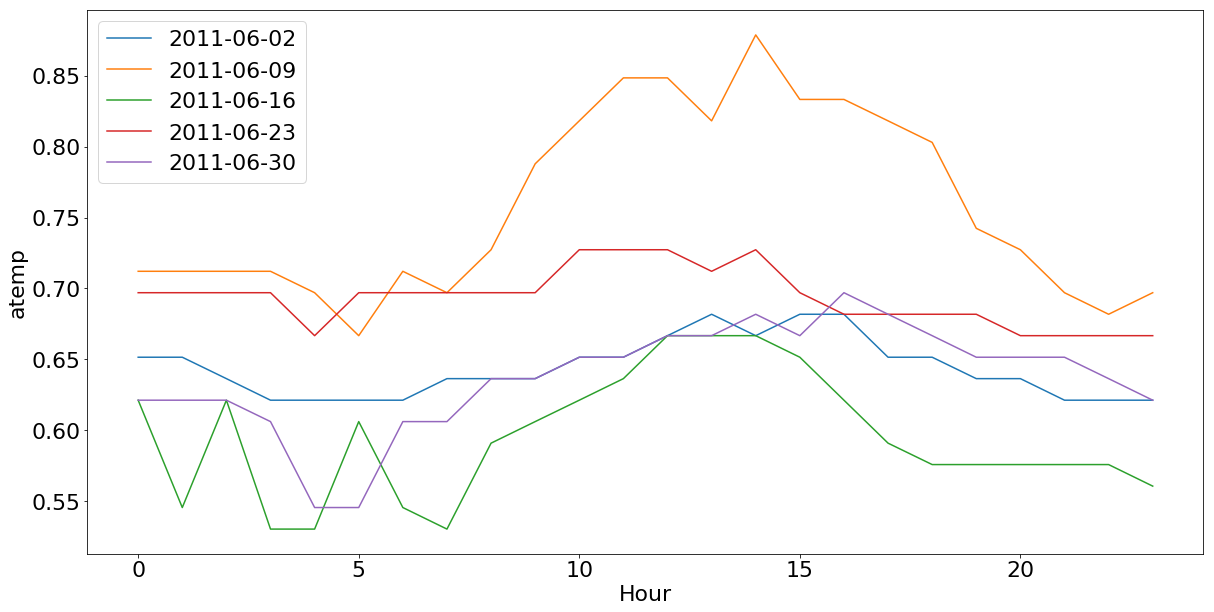

In [100]:
month_to_evaluate = '2011-06-01'
weekday = 4
legend = 'Thursdays in June'

plot_by_weekday(month_to_evaluate, legend, weekday, 'cnt')
plot_by_weekday(month_to_evaluate, legend, weekday, 'atemp')

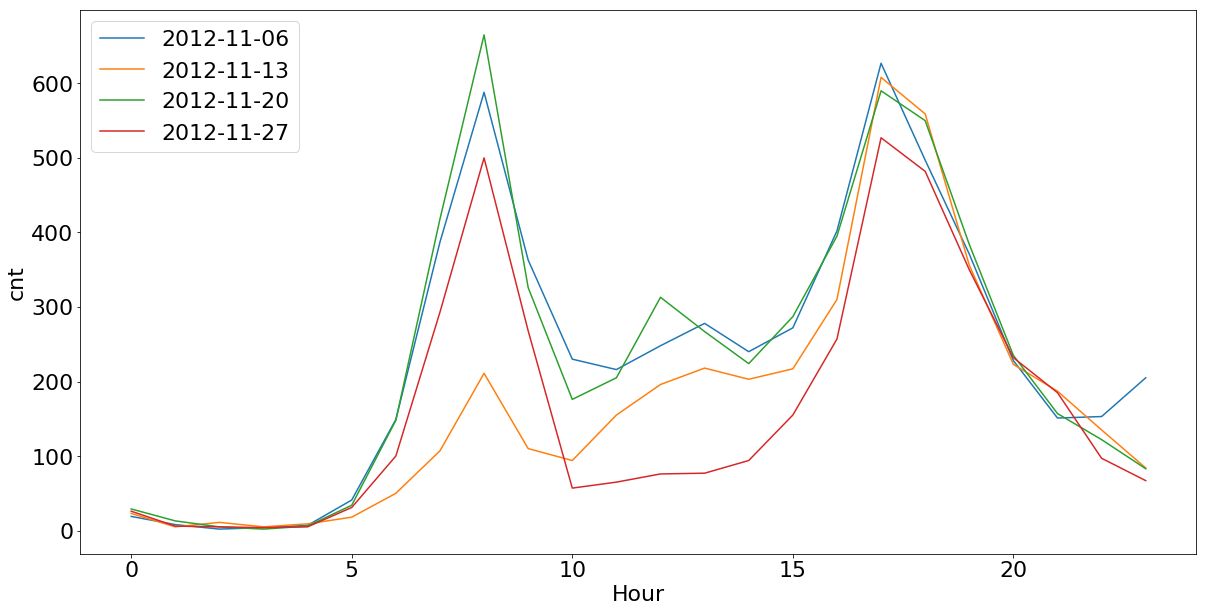

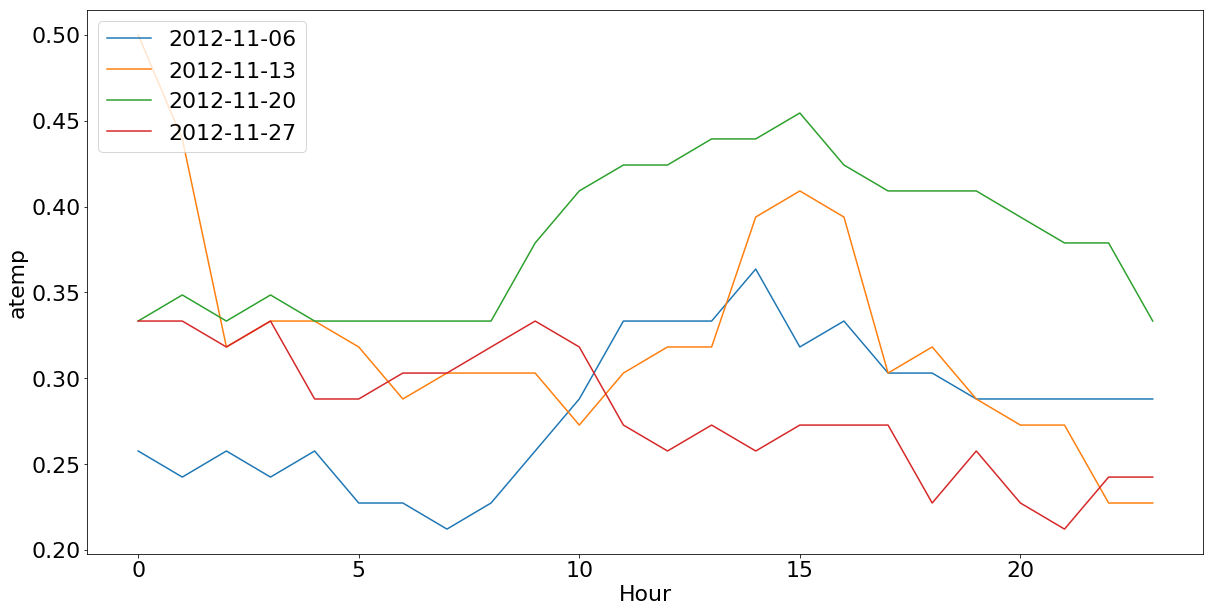

In [101]:
month_to_evaluate = '2012-11-01'
weekday = 2
legend = 'Tuesdays in November'

plot_by_weekday(month_to_evaluate, legend, weekday, 'cnt')
plot_by_weekday(month_to_evaluate, legend, weekday, 'atemp')

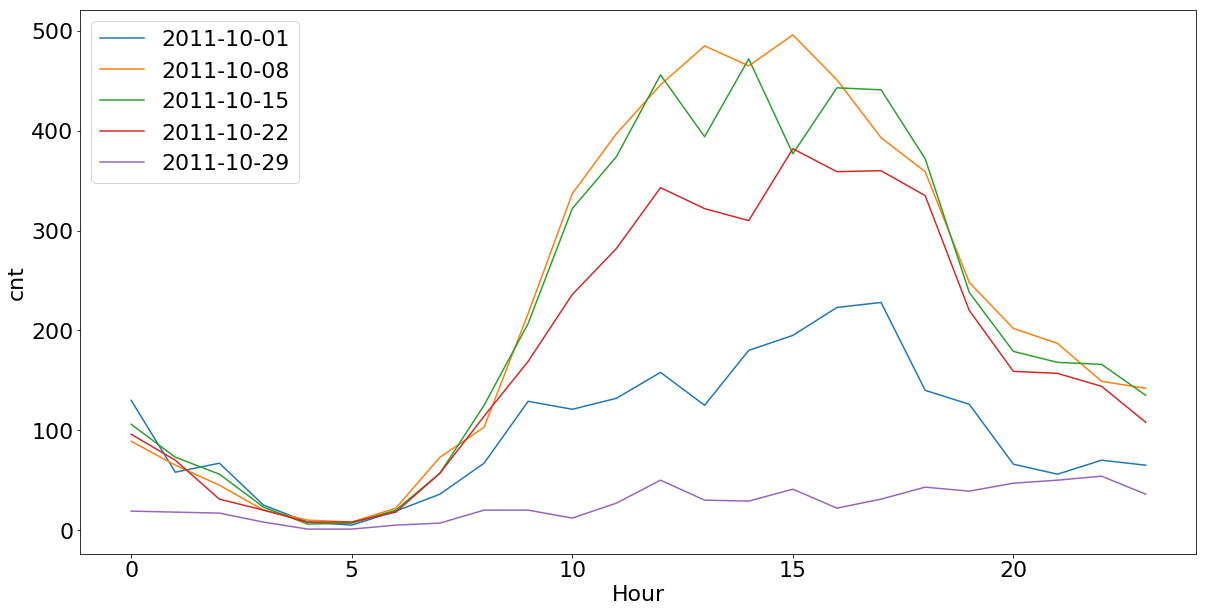

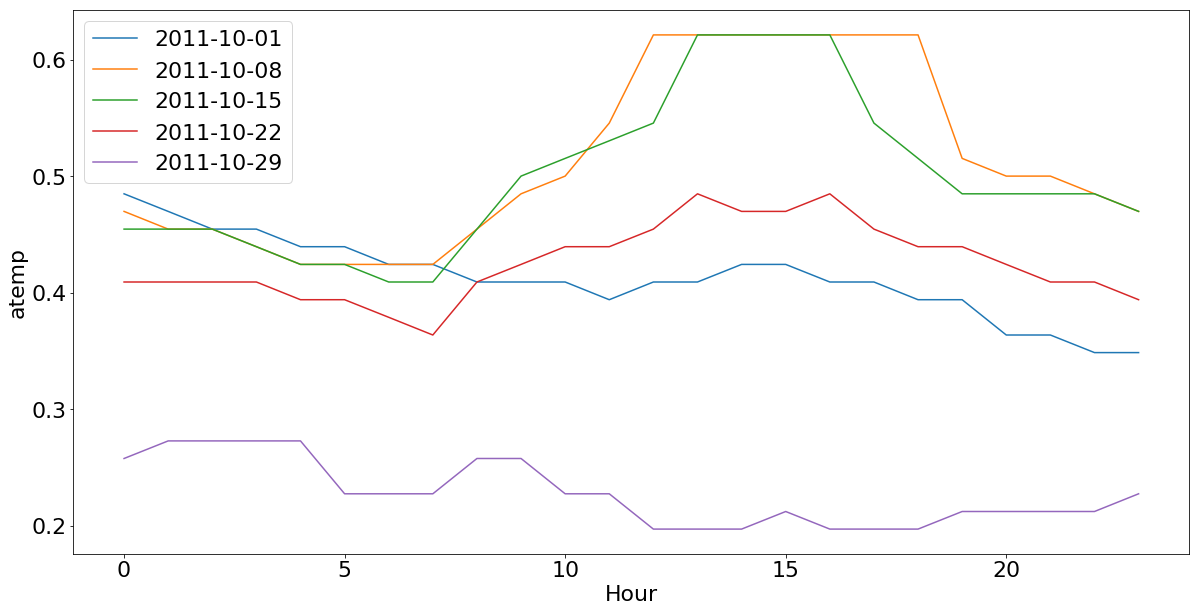

In [102]:
month_to_evaluate = '2011-10-01'
weekday = 6
legend = 'Saturdays in October'

plot_by_weekday(month_to_evaluate, legend, weekday, 'cnt')
plot_by_weekday(month_to_evaluate, legend, weekday, 'atemp')

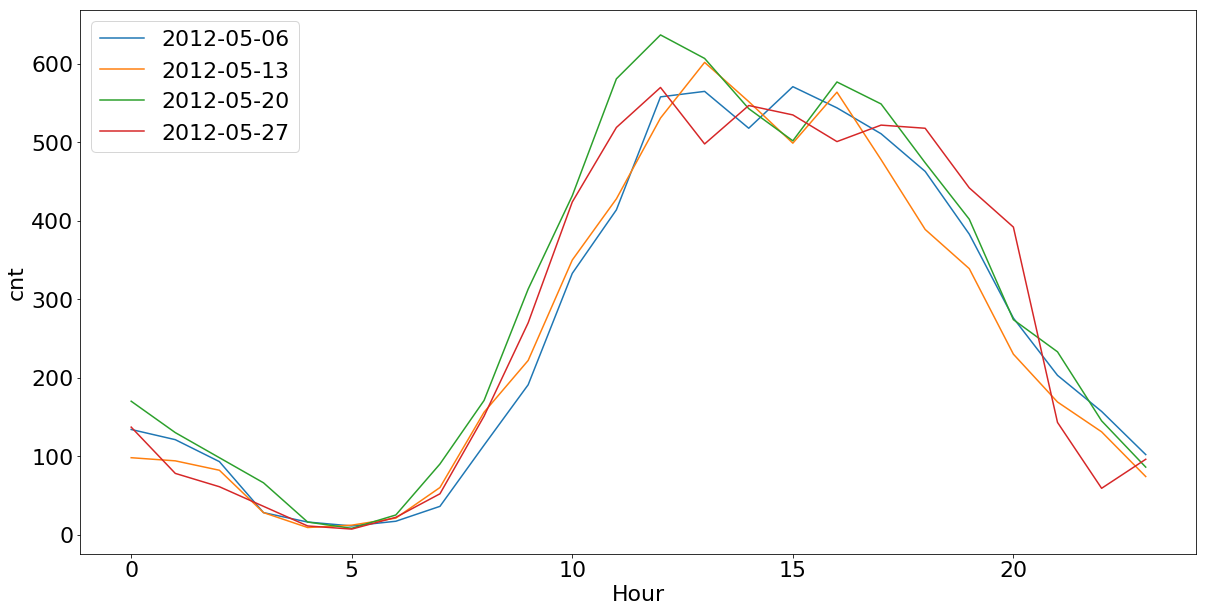

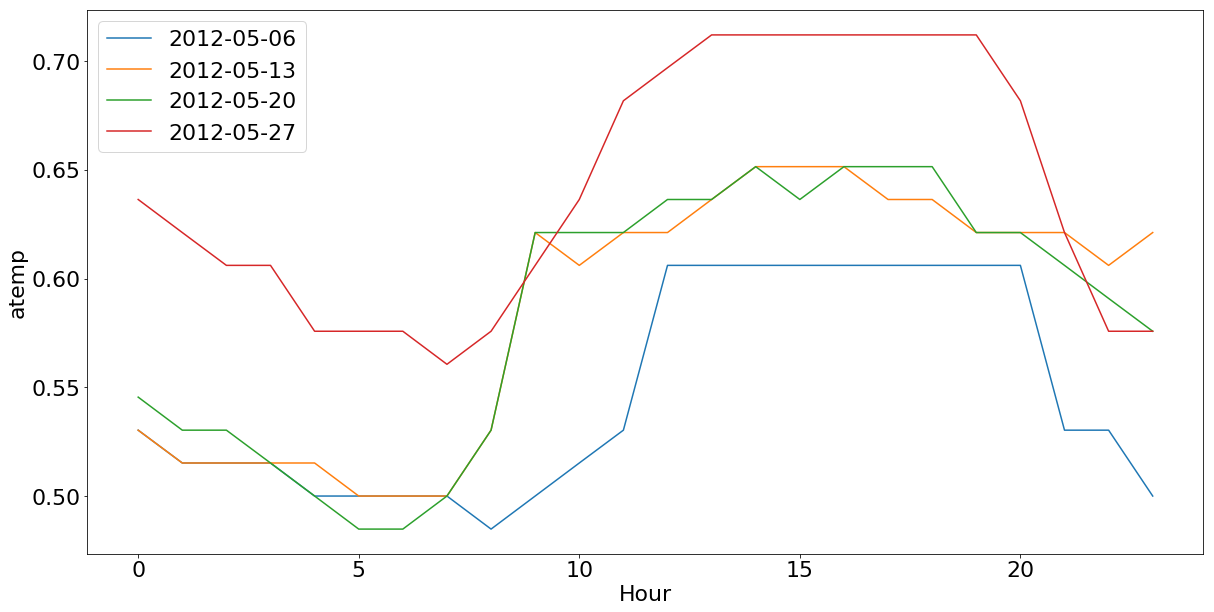

In [103]:
month_to_evaluate = '2012-05-01'
weekday = 0
legend = 'Sundays in May'

plot_by_weekday(month_to_evaluate, legend, weekday, 'cnt')
plot_by_weekday(month_to_evaluate, legend, weekday, 'atemp')

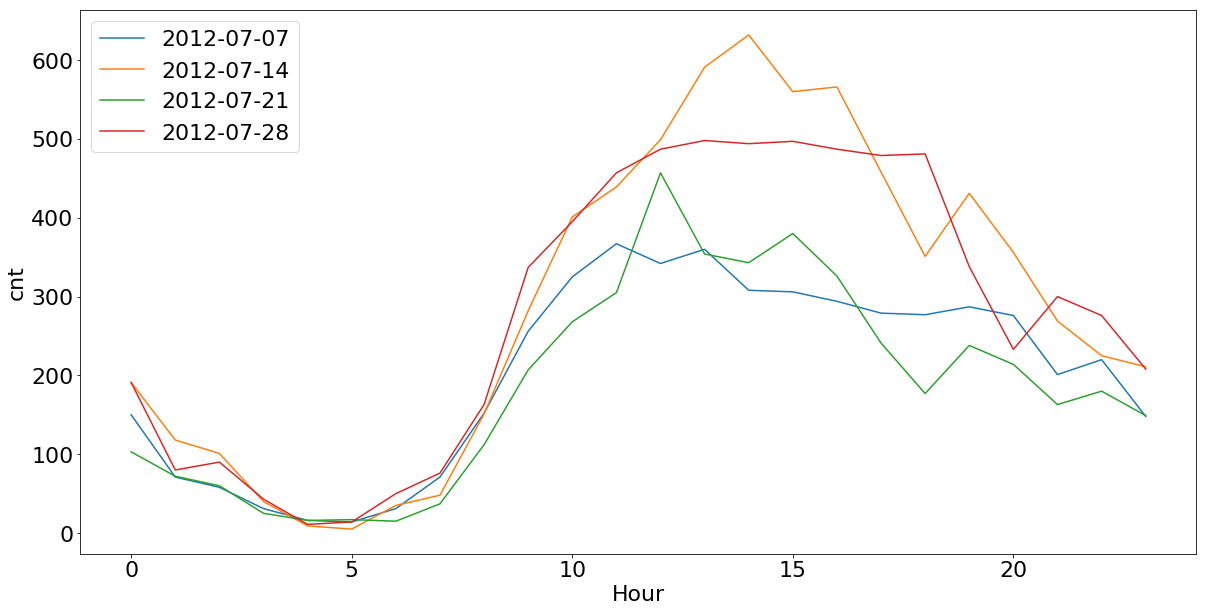

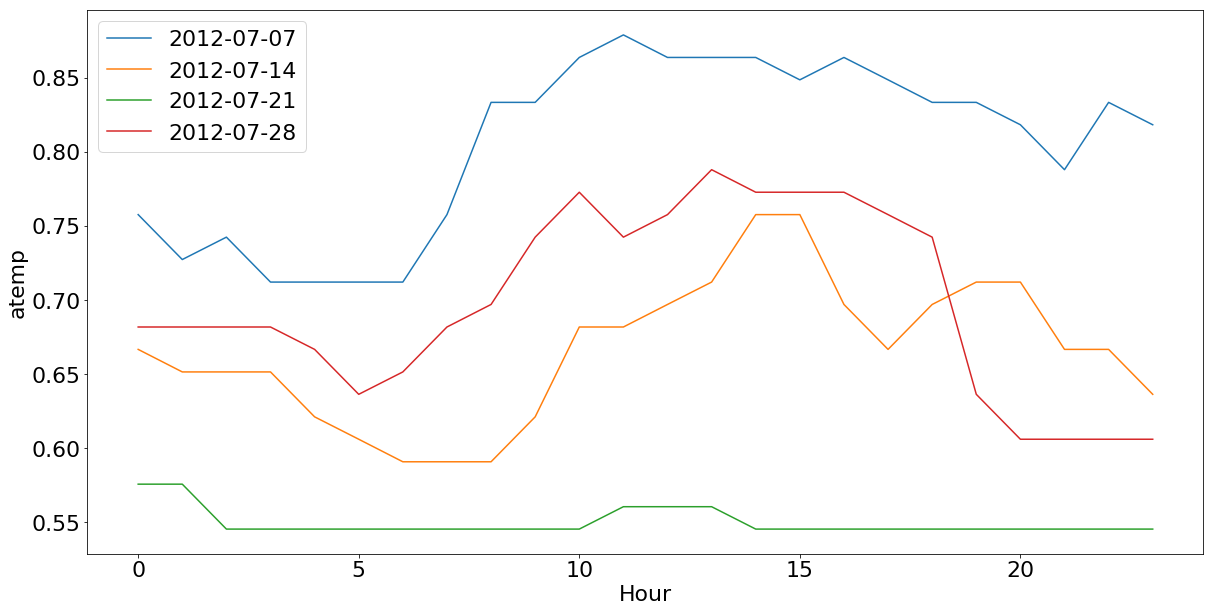

In [104]:
month_to_evaluate = '2012-07-01'
weekday = 6
legend = 'Saturdays in July'

plot_by_weekday(month_to_evaluate, legend, weekday, 'cnt')
plot_by_weekday(month_to_evaluate, legend, weekday, 'atemp')

There is some patterns of hours for working days and weekends, but they are not stabe in total counts. Apparently, there is some correlation of rides and extreme temperatures.

# Daily analysis

Let's see a more macro perspective, evaluating the day-by-day dataset.

In [189]:
import pandas as pd

dataset = pd.read_csv('resources/day.csv')
dataset['dteday'] = pd.to_datetime(dataset['dteday'])

In [190]:
dataset_2011 = filter_by_date(dataset, '2011-01-01', '2011-12-31')
dataset_2012 = filter_by_date(dataset, '2012-01-01', '2012-12-31')

There is a suspect of the a correlation between rides and temperatures. Let's plot theses two data into a daily perspective.

In [191]:
def plot_by_year(ds: DataFrame, field: str):
    plt.figure(figsize=(20,10))
    plt.plot(ds['instant'], ds[field], label=field)
    plt.xlabel('Day')
    plt.ylabel(field)
    plt.show()

<Figure size 432x288 with 0 Axes>

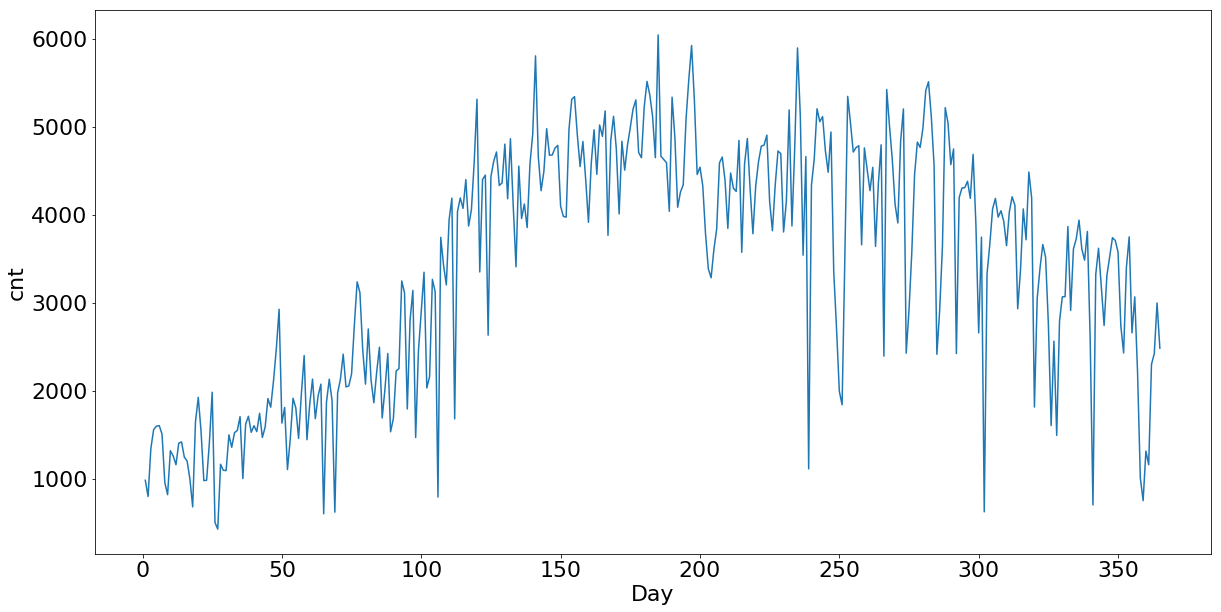

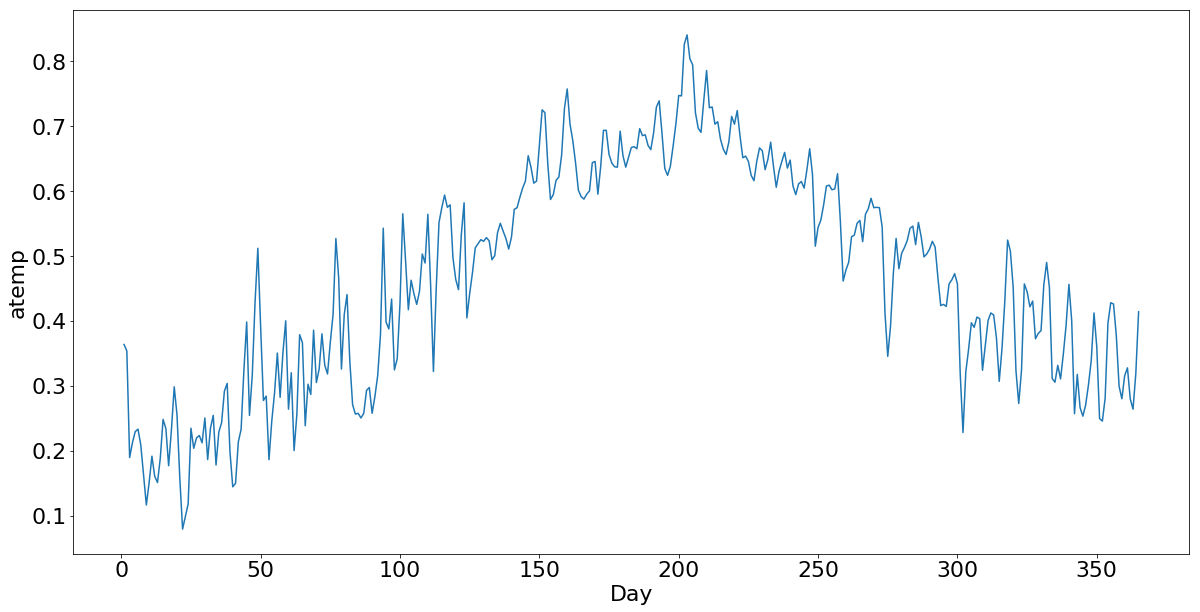

In [192]:
plt.suptitle('2011')
plot_by_year(dataset_2011, 'cnt')
plot_by_year(dataset_2011, 'atemp')

<Figure size 432x288 with 0 Axes>

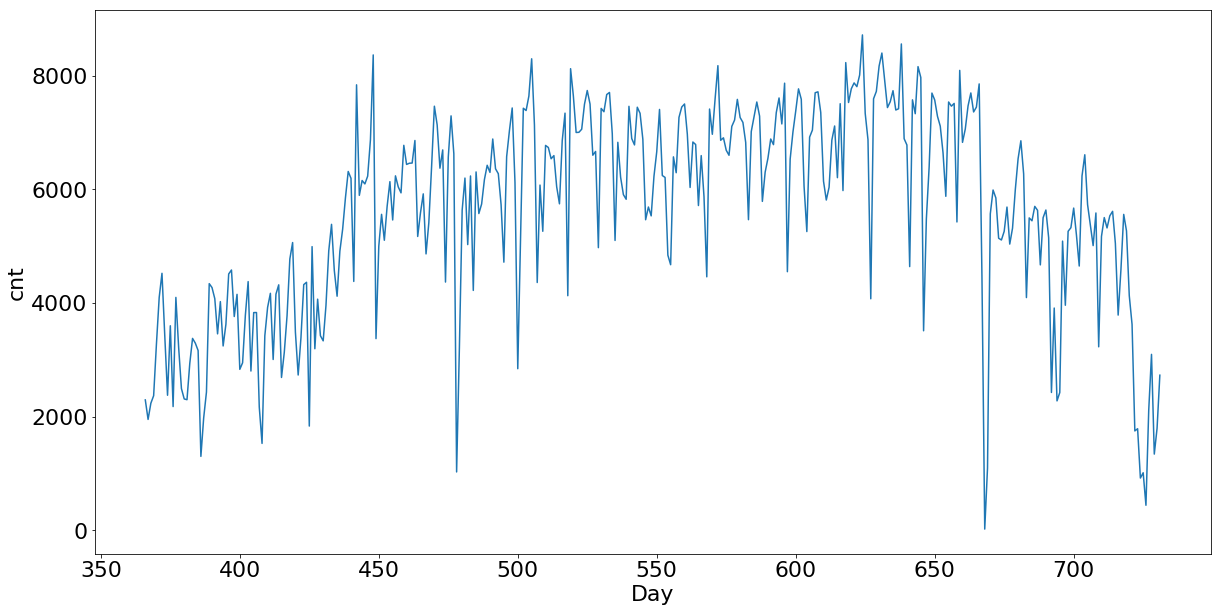

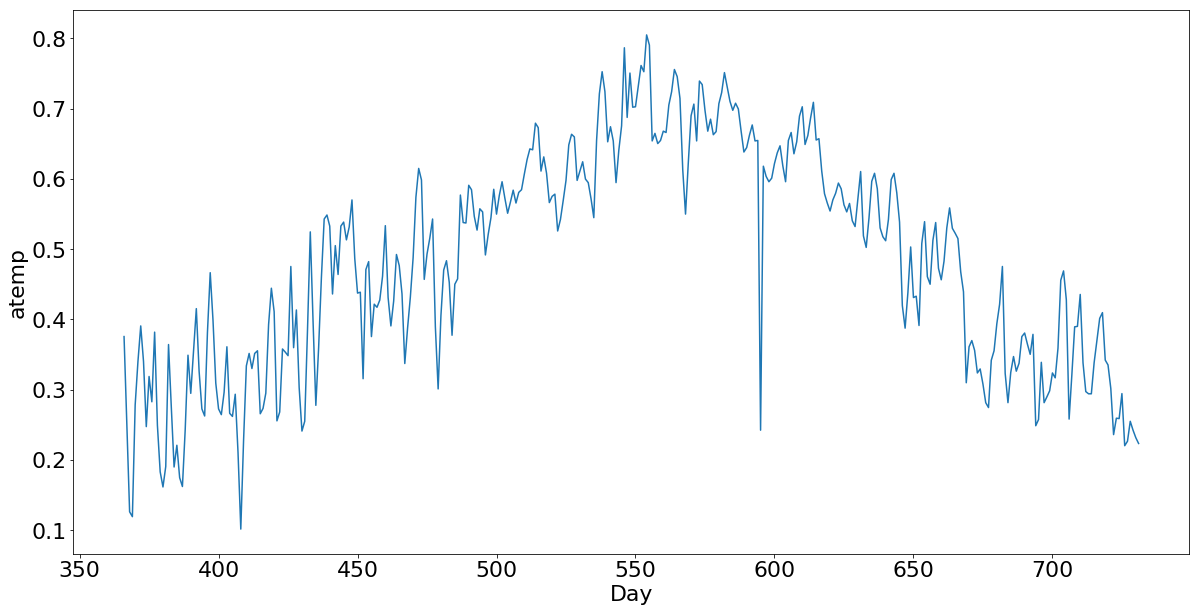

In [193]:
plt.suptitle('2011')
plot_by_year(dataset_2012, 'cnt')
plot_by_year(dataset_2012, 'atemp')

<Figure size 432x288 with 0 Axes>

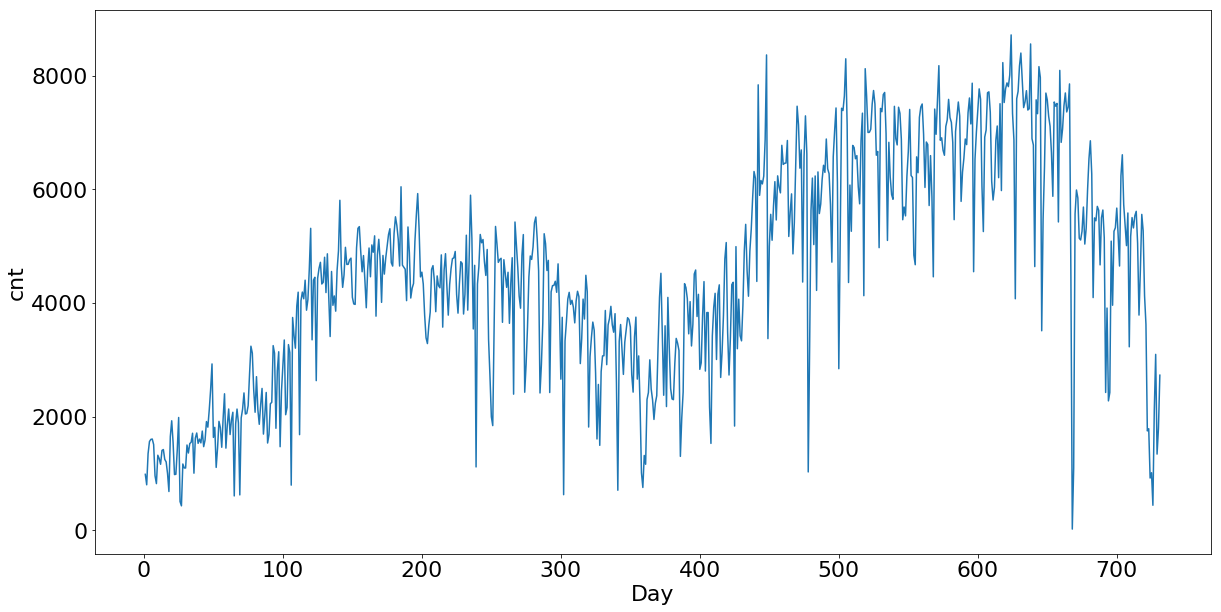

In [194]:
plt.suptitle('All')
plot_by_year(dataset, 'cnt')

As we can see, warmest days seems to have more bike ride, wich makes sense on a intuitive perspective. Besides that, there is a increasing tendency for the total number of rides for each day.

There is a clear pattern in hour for weekdays and weekends, but there is a absolute difference between weekdays and weekdends?

In [132]:
def plot_by_year_weekdays(dataset):
    
    plt.figure(figsize=(20,10))
    
    for weekday in range(7):
        weekday_dataset = dataset[dataset['weekday'] == weekday]
        qt_days = list(range(weekday_dataset.shape[0]))
        plt.plot(qt_days, weekday_dataset['cnt'], label=str(weekday))
    
    plt.legend(loc='upper left')
    plt.xlabel('Day')
    plt.ylabel('cnt')
    plt.show() 

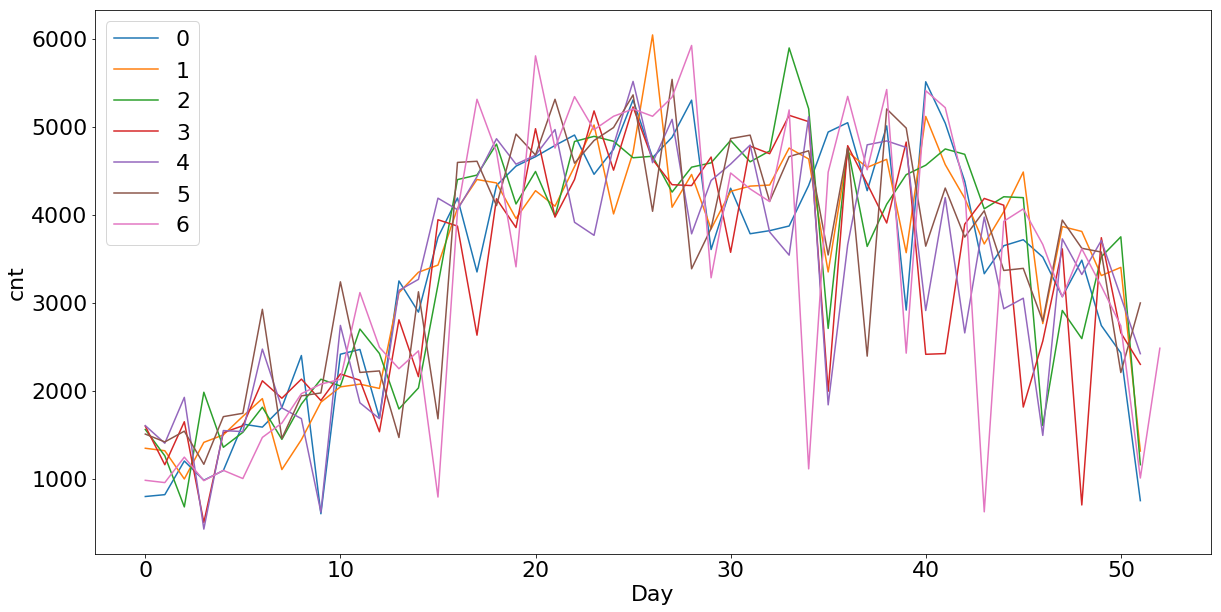

In [133]:
plot_by_year_weekdays(dataset_2011)

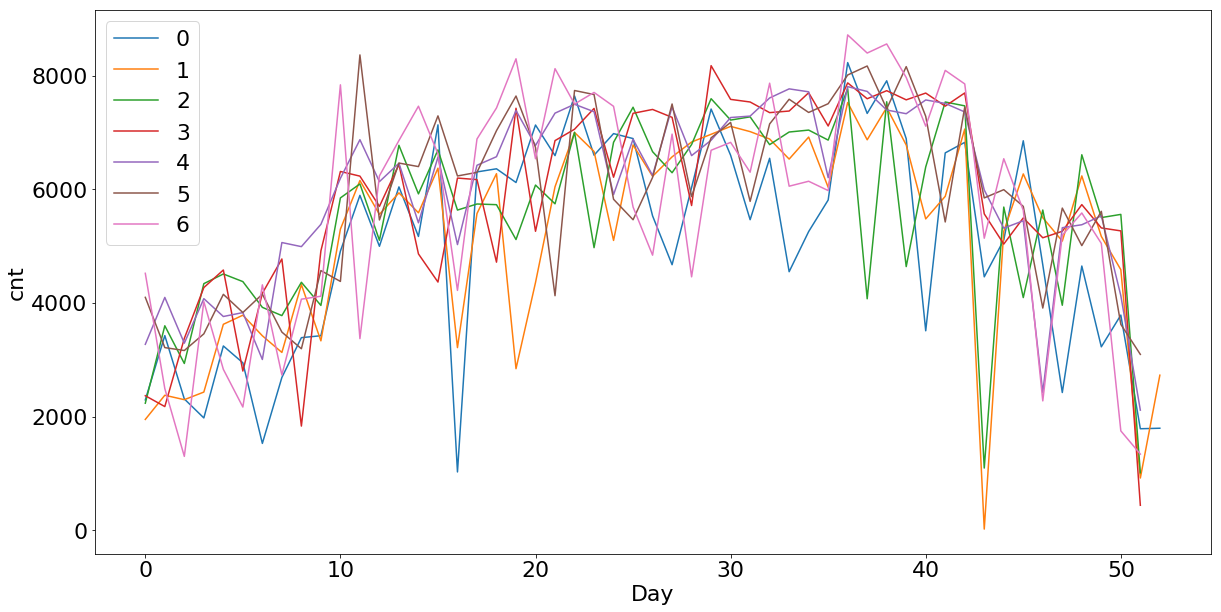

In [134]:
plot_by_year_weekdays(dataset_2012)

It seem's not really important the day of the week for the total rides, but let's focuns only on workdays and non-workdays.

In [135]:
def plot_by_year_workdays(dataset, workingday):

    plt.figure(figsize=(20,10))
    
    workingday_dataset = dataset[dataset['workingday'] == workingday]
    qt_days = list(range(workingday_dataset.shape[0]))
    plt.plot(qt_days, workingday_dataset['cnt'], label=str(weekday))
    
    plt.legend(loc='upper left')
    plt.xlabel('Day')
    plt.ylabel('cnt')
    plt.show() 

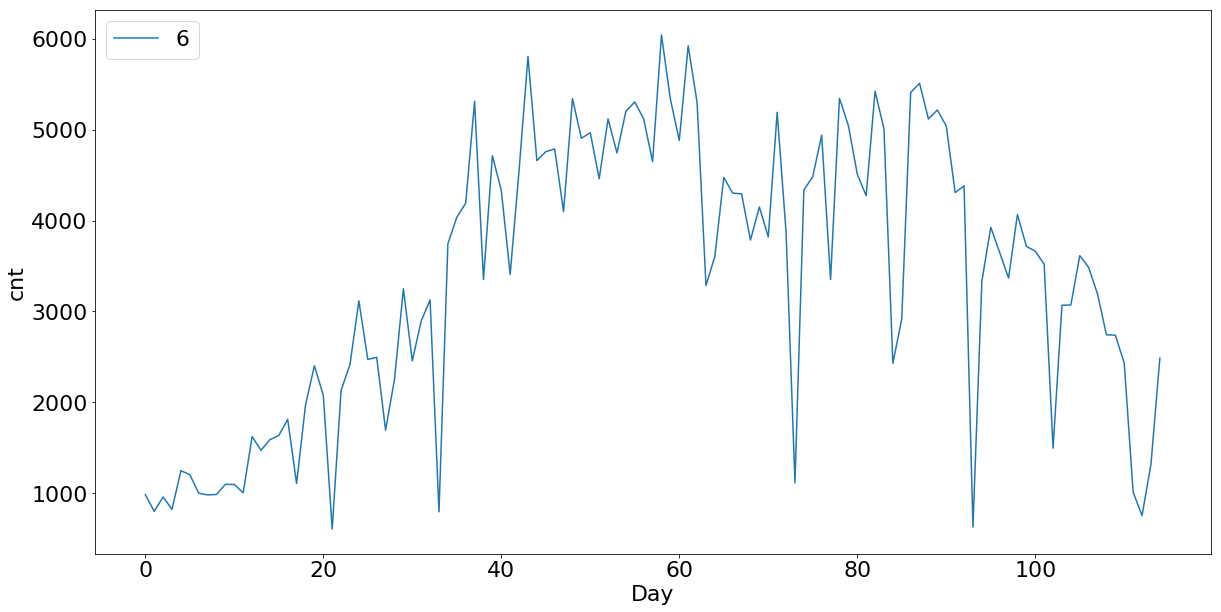

In [136]:
plot_by_year_workdays(dataset_2011, 0)

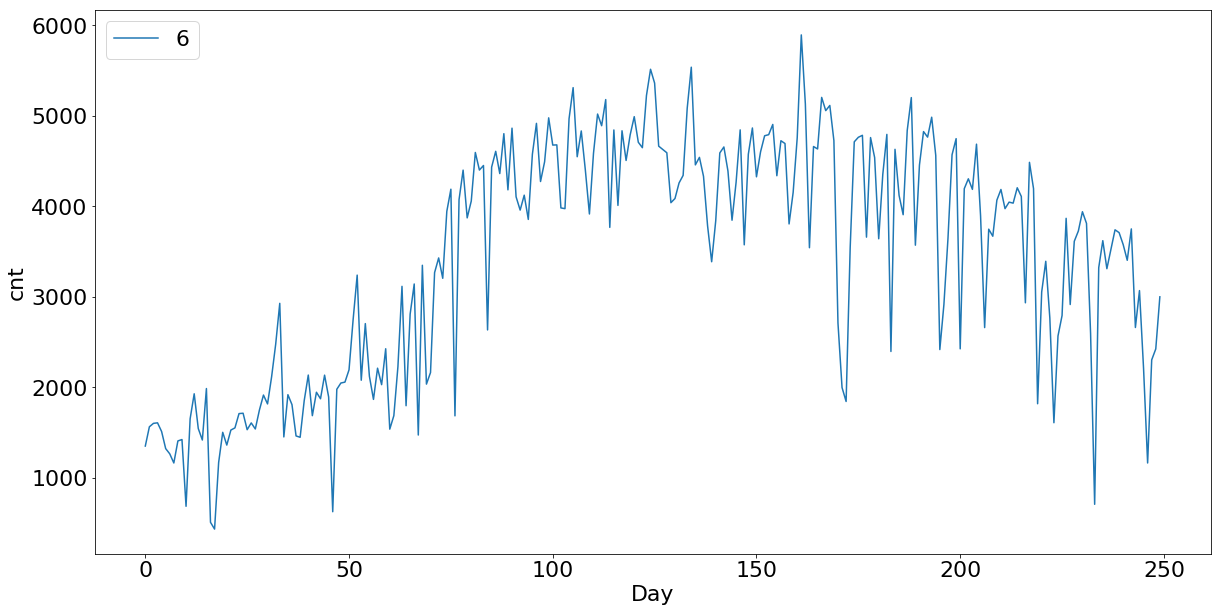

In [137]:
plot_by_year_workdays(dataset_2011, 1)

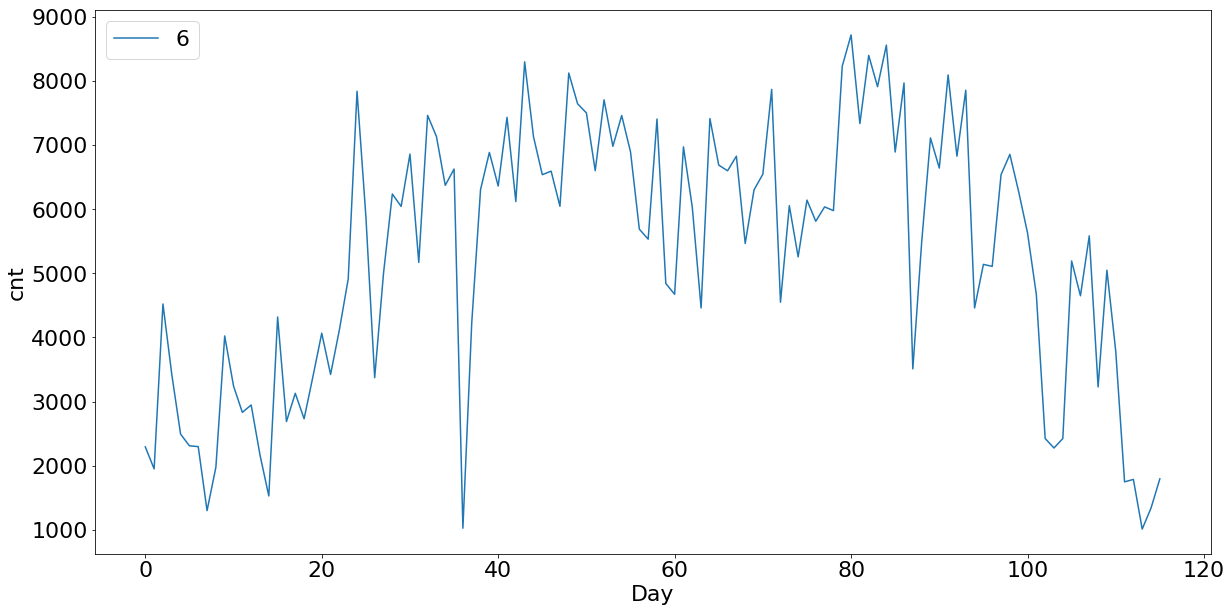

In [138]:
plot_by_year_workdays(dataset_2012, 0)

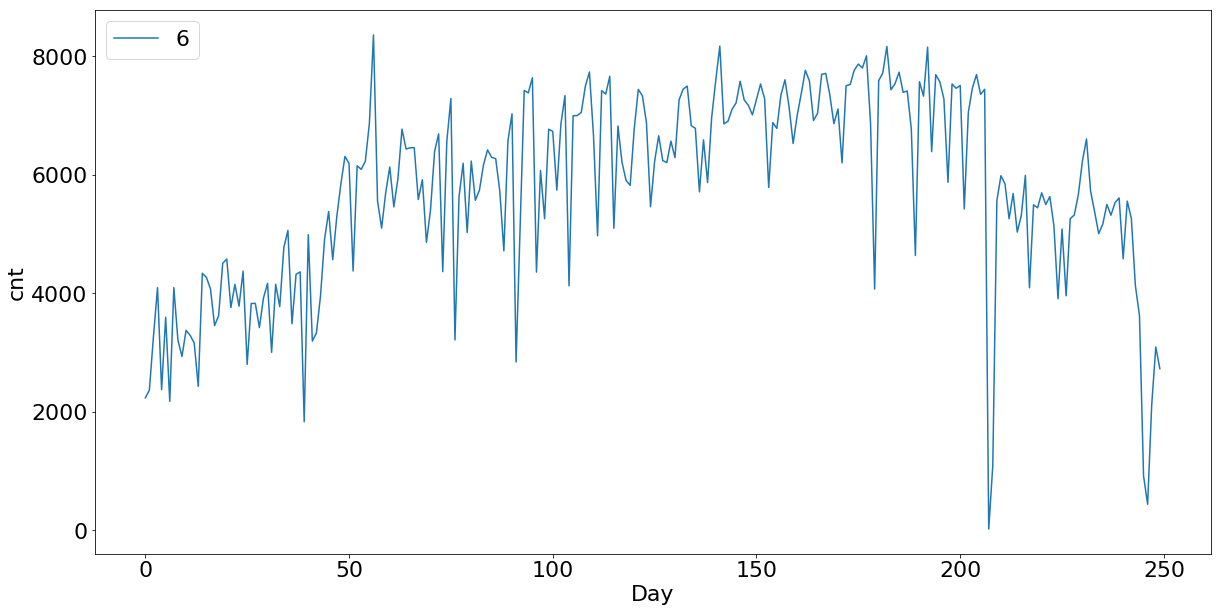

In [139]:
plot_by_year_workdays(dataset_2012, 1)

Workdays seems more stable (less variance) than weekends, it makes sense, given that people use bicycles to work on workdays and on weekends for leisure. Finally, let's understand how the "mood" of the day reflects on the number of rides.

In [196]:
def plot_by_weathersit(dataset):

    weathersits = {1: "Clear", 2: "Mist", 3: "Light Snow/Rain", 4: "Heavy Snow/Rain"}
    weathersits_values = []
    weathersits_values2 = {}
    
    for weathersit in range(1, 5):
        weathersit_dataset = dataset[dataset['weathersit'] == weathersit]
        weathersits_values.append(weathersit_dataset['cnt'])
    
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.boxplot(weathersits_values)
    ax.set_xticklabels(['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Snow/Rain'])
        
    plt.show() 

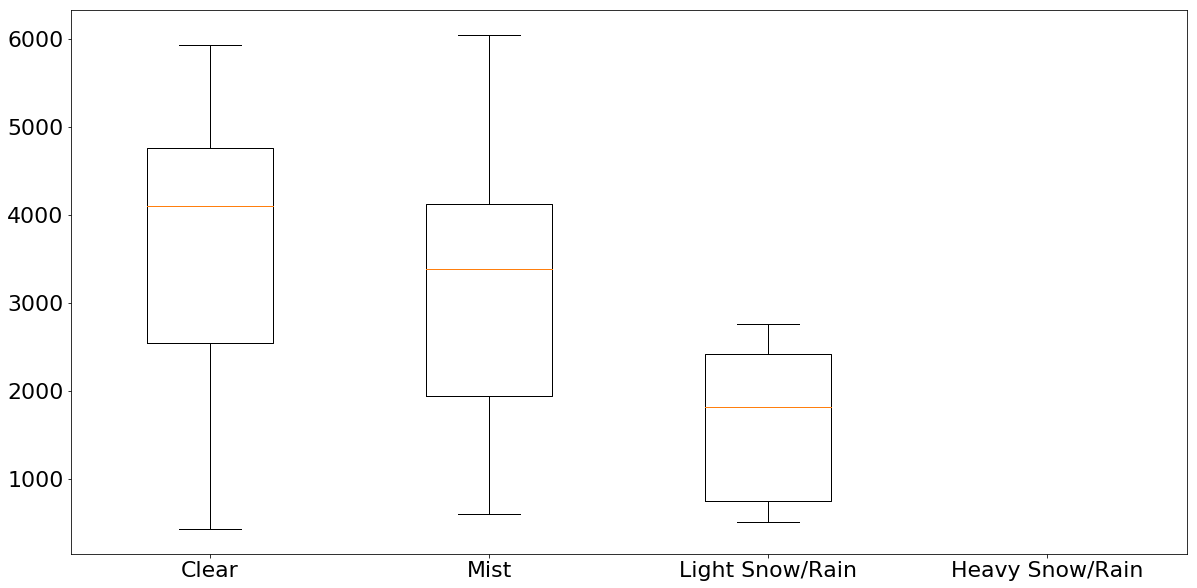

In [197]:
plot_by_weathersit(dataset_2011)

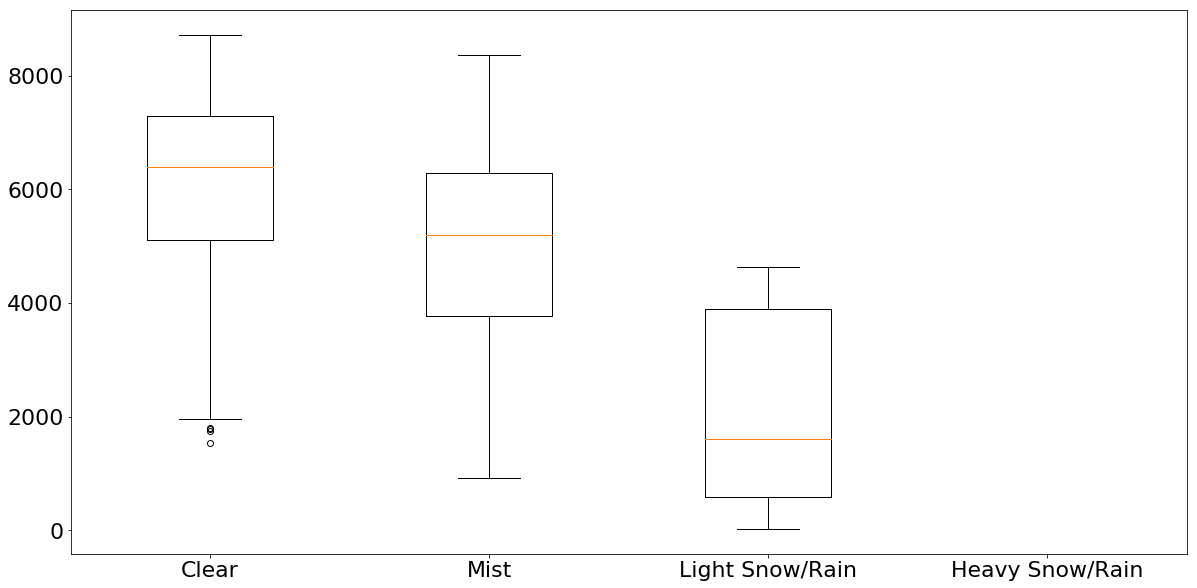

In [198]:
plot_by_weathersit(dataset_2012)

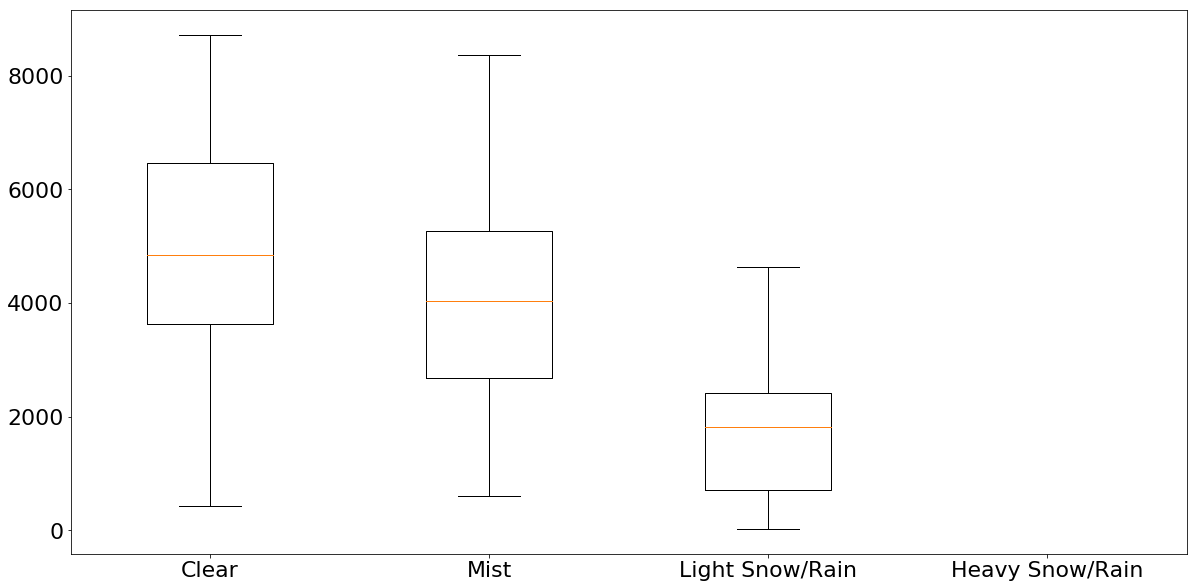

In [199]:
plot_by_weathersit(dataset)